<a href="https://colab.research.google.com/github/KaziTanvir/Chintu-the-chatbot/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1>Chatbot</h1>
<hr>
<br>

<p>
At the most basic level, a chatbot is a computer program that simulates and processes human conversation (either written or spoken), allowing humans to interact with digital devices as if they were communicating with a real person. Chatbots can be as simple as rudimentary programs that answer a simple query with a single-line response, or as sophisticated as digital assistants that learn and evolve to deliver increasing levels of personalization as they gather and process information.
</p>

<h2>The value chatbots bring to businesses and customers</h2>
<br>
<p>
Chatbots boost operational efficiency and bring cost savings to businesses while offering convenience and added services to internal employees and external customers. They allow companies to easily resolve many types of customer queries and issues while reducing the need for human interaction.
</p>

<h2>Common chatbot uses</h2>
<br>
<p>
Chatbots are frequently used to improve the IT service management experience, which delves towards self-service and automating processes offered to internal staff. With an intelligent chatbot, common tasks such as password updates, system status, outage alerts, and knowledge management can be readily automated and made available 24/7, while broadening access to commonly used voice and text based conversational interfaces.
</p>

<b>Source : </b><a href="https://www.oracle.com/in/chatbots/what-is-a-chatbot/" target="_blank">https://www.oracle.com/in/chatbots/what-is-a-chatbot/</a>

#Importing Libraries

In [ ]:
# Libraries needed for NLP
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Libraries needed for Tensorflow processing
import tensorflow as tf
import numpy as np
import random
import json

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Importing dataset

In [ ]:
#load the intents.json file from your local device
from google.colab import files
files.upload()

Saving intents.json to intents.json


{'intents.json': b'{\r\n        "intents": [\r\n                {\r\n                        "tag": "greeting",\r\n                        "patterns": [\r\n                                "Hi",\r\n                                "How are you",\r\n                                "Is anyone there?",\r\n                                "Hello",\r\n                                "Good day"\r\n                        ],\r\n                        "responses": [\r\n                                "Hello, thanks for visiting",\r\n                                "Good to see you again",\r\n                                "Hi there, how can I help?"\r\n                        ],\r\n                        "context_set": ""\r\n                },\r\n                {\r\n                        "tag": "goodbye",\r\n                        "patterns": [\r\n                                "Bye",\r\n                                "See you later",\r\n                                "Goodbye"\r\n     

In [ ]:
# import our chat-bot intents file
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [ ]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day'],
   'responses': ['Hello, thanks for visiting',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context_set': ''},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later, thanks for visiting',
    'Have a nice day',
    'Bye! Come back again soon.']},
  {'tag': 'thanks',
   'patterns': ['Thanks', 'Thank you', "That's helpful"],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure']},
  {'tag': 'chatbot',
   'patterns': ['Who built this chatbot?',
    'Tell me about Chatbot',
    'What is this chatbot name?'],
   'responses': ['Hi, I am Chatbot by name is Chintu.',
    'Thanks for asking. I am designed by Kazi Tanvir.',
    'I am Chintu.']},
  {'tag': 'location',
   'patterns': ['What is your location?',
    'Where are you located?',
    'What is your address?'],
   'responses': ['We are from Banglades

#Data Preprocessing


In [ ]:
words = []
classes = []
documents = []
ignore = ['?']
# loop through each sentence in the intent's patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each and every word in the sentence
        w = nltk.word_tokenize(pattern)
        # add word to the words list
        words.extend(w)
        # add word(s) to documents
        documents.append((w, intent['tag']))
        # add tags to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
# Perform stemming and lower each word as well as remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))

# remove duplicate classes
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

27 documents
8 classes ['about', 'chatbot', 'connect', 'goodbye', 'greeting', 'location', 'movies', 'thanks']
52 unique stemmed words ["'s", 'about', 'account', 'address', 'ani', 'anyon', 'are', 'built', 'bye', 'can', 'chatbot', 'connect', 'day', 'favourit', 'give', 'good', 'goodby', 'hello', 'help', 'hi', 'how', 'i', 'is', 'later', 'link', 'locat', 'me', 'media', 'movi', 'name', 'out', 'reach', 'recommend', 'see', 'social', 'some', 'suggest', 'tell', 'thank', 'that', 'there', 'thi', 'to', 'way', 'we', 'what', 'where', 'which', 'who', 'you', 'your', 'yourself']


#Creating and Training Model

In [ ]:
# create training data
training = []
output = []
# create an empty array for output
output_empty = [0] * len(classes)

# create training set, bag of words for each sentence
for doc in documents:
    # initialize bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stemming each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is '1' for current tag and '0' for rest of other tags
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# shuffling features and turning it into np.array
random.shuffle(training)
training = np.array(training)

# creating training lists
train_x = list(training[:,0])
train_y = list(training[:,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
#creating the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=(len(train_x[0]),)))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(len(train_y[0]), activation='softmax'))
model.compile(tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                530       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=16, verbose=2,validation_split=.25).history
model.save("model.pkl")

Epoch 1/100
2/2 - 4s - loss: 2.0633 - accuracy: 0.1500 - val_loss: 2.1629 - val_accuracy: 0.0000e+00 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 2.0457 - accuracy: 0.1500 - val_loss: 2.1612 - val_accuracy: 0.0000e+00 - 46ms/epoch - 23ms/step
Epoch 3/100
2/2 - 0s - loss: 2.0315 - accuracy: 0.2500 - val_loss: 2.1601 - val_accuracy: 0.0000e+00 - 34ms/epoch - 17ms/step
Epoch 4/100
2/2 - 0s - loss: 2.0175 - accuracy: 0.2500 - val_loss: 2.1593 - val_accuracy: 0.0000e+00 - 52ms/epoch - 26ms/step
Epoch 5/100
2/2 - 0s - loss: 2.0046 - accuracy: 0.2500 - val_loss: 2.1583 - val_accuracy: 0.0000e+00 - 103ms/epoch - 52ms/step
Epoch 6/100
2/2 - 0s - loss: 1.9920 - accuracy: 0.2500 - val_loss: 2.1579 - val_accuracy: 0.0000e+00 - 46ms/epoch - 23ms/step
Epoch 7/100
2/2 - 0s - loss: 1.9797 - accuracy: 0.2500 - val_loss: 2.1572 - val_accuracy: 0.0000e+00 - 31ms/epoch - 16ms/step
Epoch 8/100
2/2 - 0s - loss: 1.9673 - accuracy: 0.2500 - val_loss: 2.1566 - val_accuracy: 0.0000e+00 - 51ms/epoch - 26ms/

#Accuracy

<Figure size 432x288 with 0 Axes>

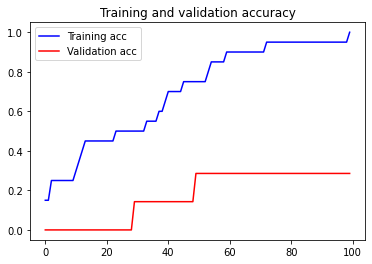

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

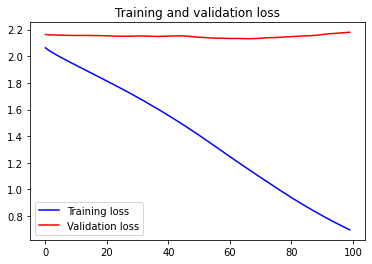

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#Prediction making

In [ ]:
import pickle
pickle.dump( {'words':words, 'classes':classes}, open( "training_data", "wb" ) )

In [ ]:
from keras.models import load_model
model = load_model("model.pkl")

In [ ]:
# restoring all the data structures
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']

In [ ]:
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [ ]:
def clean_up_sentence(sentence):
    # tokenizing the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stemming each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# returning bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words):
    # tokenizing the pattern
    sentence_words = clean_up_sentence(sentence)
    # generating bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
    bag=np.array(bag)
    return(bag)

In [ ]:
ERROR_THRESHOLD = 0.30
def classify(sentence):
    # generate probabilities from the model
    bag = bow(sentence, words)
    results = model.predict(np.array([bag]))
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results[0]) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    return return_list

def response(sentence):
    results = classify(sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # a random response from the intent
                    return print(random.choice(i['responses']))

            results.pop(0)

In [ ]:
response("What is this chatbot name?")

I am Chintu.


In [ ]:
response("Which is your favourite movie?")

Zindagi na Milegi Doobara


In [ ]:
response("Give me your social media accounts link")

You can connect me on Linkedin or Github 
 Linkedin - https://www.linkedin.com/in/kazi-tanvir/ 
 Github - https://github.com/KaziTanvir


In [ ]:
response("where are you from?")

We are from Bangladesh.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
